In [8]:
import inspect

In [232]:
run grid.py

In [65]:
grid_assignment = lambda grid1: np.array([grid1.assignment[node] for node in grid1.graph.nodes()])

In [278]:
a1 = dict()
for key in grid1.assignment.keys():
    a1[key] = grid1.assignment[key] % 2

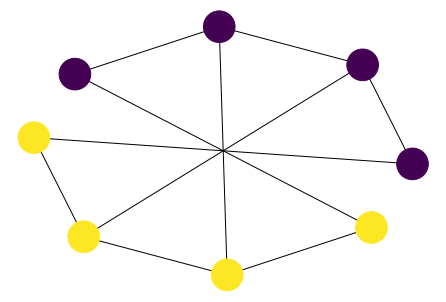

In [279]:
# Create and plot a grid and its initial partition
m = 2
y = 4
grid1 = grid.Grid((m, y), assignment=a1, updaters={"pops": district_populations, 'id': lambda p: np.sum(grid_assignment(p)*2**np.arange(m*y))})
plot_districts(grid1, save=False, savetitle="default_grid")
k = nx.kamada_kawai_layout(grid1.graph)

In [51]:
g2 = proposals.recom(grid1, 'population', 4, 0.26)

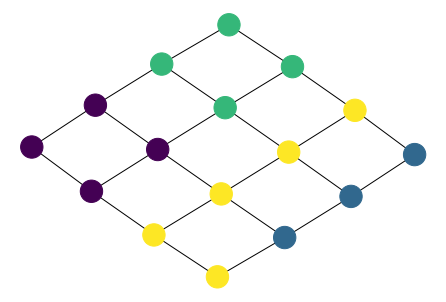

In [52]:
plot_districts(g2, layout=k)

In [280]:
n = 10000
constraints = []
accept = lambda p: True
proposal = partial(proposals.recom, pop_col='population', pop_target=4, epsilon=0.01)
chain = MarkovChain(proposal, constraints, accept, grid1, n)

In [281]:
data = pd.DataFrame(columns=['id', 'pops'], index=range(n))
counter = 0
for p in tqdm(chain):
    data.loc[counter, 'id'] = p['id']
    data.loc[counter, 'pops'] = p['pops'] 
    counter += 1

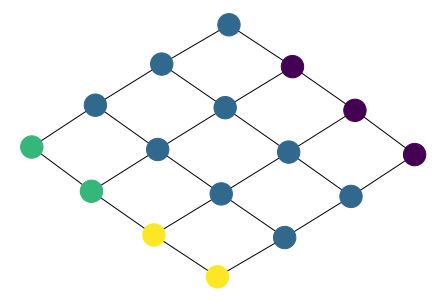

In [130]:
plot_districts(p, layout=k)

In [182]:
def number_distinct(l, eq = lambda x, y: x==y):
    if len(l) == 0:
        return 0
    
    item = l[0]
    items_to_remove = []
    for i, element in enumerate(l):
        if eq(element, item):
            items_to_remove.append(i)
    
    for i in items_to_remove[::-1]:
        del l[i]
                
    return 1 + number_distinct(l, eq=eq)

def remove_duplicates(l, eq=lambda x, y: x==y):
    if len(l) == 0:
        return l
    
    item = l[0]
    items_to_remove = []
    for i, element in enumerate(l[1:]):
        if eq(element, item):
            items_to_remove.append(i+1)
    
    for i in items_to_remove[::-1]:
        del l[i]
                
    return [l[0]] + remove_duplicates(l[1:], eq=eq)

In [135]:
data['id'][:3604]

0       [0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 3, 3, 1, 1, 3, 3]
1       [0, 0, 2, 2, 0, 0, 2, 2, 1, 3, 3, 3, 1, 1, 3, 3]
2       [0, 0, 2, 2, 0, 0, 2, 2, 1, 3, 3, 3, 1, 1, 3, 3]
3       [0, 0, 2, 2, 0, 0, 2, 2, 1, 3, 3, 3, 1, 1, 3, 3]
4       [2, 2, 0, 0, 2, 2, 0, 0, 1, 3, 3, 3, 1, 1, 3, 3]
                              ...                       
3599    [1, 1, 2, 2, 0, 3, 2, 3, 0, 3, 3, 3, 0, 3, 3, 3]
3600    [1, 1, 2, 2, 0, 3, 3, 2, 0, 3, 3, 3, 0, 3, 3, 3]
3601    [1, 1, 2, 2, 0, 3, 3, 2, 0, 0, 3, 3, 3, 3, 3, 3]
3602    [1, 1, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 2, 2, 3]
3603    [1, 1, 3, 3, 0, 3, 3, 3, 0, 2, 3, 3, 0, 2, 2, 3]
Name: id, Length: 3604, dtype: object

In [282]:
l = remove_duplicates(list(data['id']), eq=lambda x,y: np.all(x==y))

In [307]:
from itertools import combinations

In [313]:
for i in list(combinations(range(10), 7)):
    if 
    

(0, 1, 2, 3, 4, 5, 6)
(0, 1, 2, 3, 4, 5, 7)
(0, 1, 2, 3, 4, 5, 8)
(0, 1, 2, 3, 4, 5, 9)
(0, 1, 2, 3, 4, 6, 7)
(0, 1, 2, 3, 4, 6, 8)
(0, 1, 2, 3, 4, 6, 9)
(0, 1, 2, 3, 4, 7, 8)
(0, 1, 2, 3, 4, 7, 9)
(0, 1, 2, 3, 4, 8, 9)
(0, 1, 2, 3, 5, 6, 7)
(0, 1, 2, 3, 5, 6, 8)
(0, 1, 2, 3, 5, 6, 9)
(0, 1, 2, 3, 5, 7, 8)
(0, 1, 2, 3, 5, 7, 9)
(0, 1, 2, 3, 5, 8, 9)
(0, 1, 2, 3, 6, 7, 8)
(0, 1, 2, 3, 6, 7, 9)
(0, 1, 2, 3, 6, 8, 9)
(0, 1, 2, 3, 7, 8, 9)
(0, 1, 2, 4, 5, 6, 7)
(0, 1, 2, 4, 5, 6, 8)
(0, 1, 2, 4, 5, 6, 9)
(0, 1, 2, 4, 5, 7, 8)
(0, 1, 2, 4, 5, 7, 9)
(0, 1, 2, 4, 5, 8, 9)
(0, 1, 2, 4, 6, 7, 8)
(0, 1, 2, 4, 6, 7, 9)
(0, 1, 2, 4, 6, 8, 9)
(0, 1, 2, 4, 7, 8, 9)
(0, 1, 2, 5, 6, 7, 8)
(0, 1, 2, 5, 6, 7, 9)
(0, 1, 2, 5, 6, 8, 9)
(0, 1, 2, 5, 7, 8, 9)
(0, 1, 2, 6, 7, 8, 9)
(0, 1, 3, 4, 5, 6, 7)
(0, 1, 3, 4, 5, 6, 8)
(0, 1, 3, 4, 5, 6, 9)
(0, 1, 3, 4, 5, 7, 8)
(0, 1, 3, 4, 5, 7, 9)
(0, 1, 3, 4, 5, 8, 9)
(0, 1, 3, 4, 6, 7, 8)
(0, 1, 3, 4, 6, 7, 9)
(0, 1, 3, 4, 6, 8, 9)
(0, 1, 3, 4, 7, 8, 9)
(0, 1, 3, 

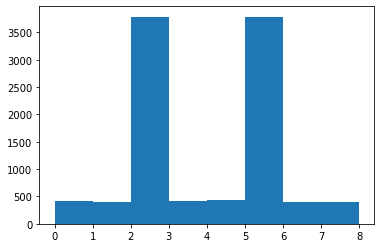

In [288]:
ids = sorted(l)
d = dict()
for i, u in enumerate(ids):
    d[u] = i
    
plot_data = []
for i in data['id']:
    plot_data.append(d[i])

na, b, p = plt.hist(pd.Series(plot_data), bins=np.arange(9))

In [290]:
common = list(np.argwhere(na > 1000).flatten())
common

[2, 5]

In [315]:
3782+3787

7569

In [304]:
for c in common:
    print(sorted(l)[c])

51
204


In [303]:
l

[240, 204, 51, 142, 113, 23, 232, 15]

In [293]:
def unwind(ni):
    l = [0]*8
    for i in range(8):
        l[i] = ni%2
        ni = ni//2
    return np.array(l)

In [261]:
type(unwind(65280))

numpy.ndarray

In [302]:
2**7

128

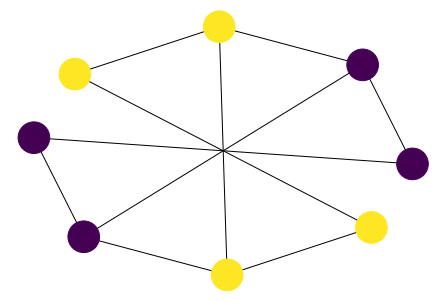

In [306]:
plot_districts(grid1, districts=unwind(204), layout=k)

In [162]:
ex = data['id'][50].copy()

In [163]:
np.sum(ex*2**np.arange(16))

2184

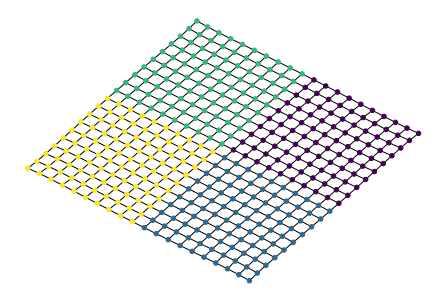

In [318]:
grid2 = grid.Grid((20, 20), updaters={"pops": district_populations})
plot_districts(grid2, save=False, savetitle="default_grid")
k2 = nx.kamada_kawai_layout(grid2.graph)

In [322]:
from my_recom import ReCom

In [324]:
r = ReCom('population', 100, 0.02)

In [337]:
utah = Graph.from_json('graph_combined_vs_2018.json')

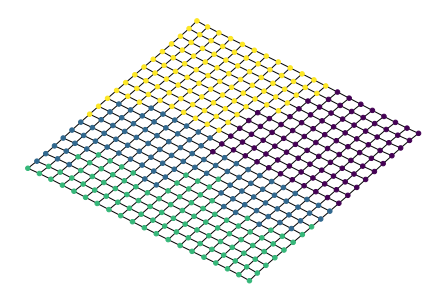

In [368]:
plot_districts(r(r(r(r(r(r(grid2)))))), layout=k2)

In [82]:
import os
import sys

In [83]:
sys.path

['C:\\Users\\Jacob\\Anaconda3\\Lib',
 'C:\\Users\\Jacob\\Anaconda3\\python36.zip',
 'C:\\Users\\Jacob\\Anaconda3\\DLLs',
 'C:\\Users\\Jacob\\Anaconda3',
 '',
 'C:\\Users\\Jacob\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Jacob\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Jacob\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Jacob\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Jacob\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Jacob\\.ipython']

In [15]:
print(inspect.getsource(proposals.recom))

def recom(
    partition, pop_col, pop_target, epsilon, node_repeats=1, method=bipartition_tree
):
    """ReCom proposal.

    Description from MGGG's 2018 Virginia House of Delegates report:
    At each step, we (uniformly) randomly select a pair of adjacent districts and
    merge all of their blocks in to a single unit. Then, we generate a spanning tree
    for the blocks of the merged unit with the Kruskal/Karger algorithm. Finally,
    we cut an edge of the tree at random, checking that this separates the region
    into two new districts that are population balanced.

    Example usage::

        from functools import partial
        from gerrychain import MarkovChain
        from gerrychain.proposals import recom

        # ...define constraints, accept, partition, total_steps here...

        # Ideal population:
        pop_target = sum(partition["population"].values()) / len(partition)

        proposal = partial(
            recom, pop_col="POP10", pop_target=pop_target, epsi